# Statistics Coding Challenge #1

In this coding challenge, we are going to use the "Accidental Drug Related Deaths 2012-2017 (State of Connecticut)" data set available from the Data.Gov website (https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation). 

There are 2 main objectives you need to accomplish:

1) First treat missing values for the "Death City" attribute - replace any missing values in the "Death City" with the city that has experienced the most number of deaths

For each city, do the following:

2) Compute summary statistics for the *age* attribute:


a) Mean

b) Median

c) 25%, 50% and 75% percentiles using [np.percentile](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.percentile.html)

d) Examine any outliers in data using [Boxplots](https://matplotlib.org/2.1.1/gallery/statistics/boxplot_demo.html)

e) Construct a Bee Swarm plot to highlight the distibution of age by each city using [seaborn.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)




In [15]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

!wget https://data.ct.gov/api/views/rybz-nyjw/rows.csv?accessType=DOWNLOAD -O /tmp/DRUG_RELATED_Deaths.csv

--2018-04-30 18:59:21--  https://data.ct.gov/api/views/rybz-nyjw/rows.csv?accessType=DOWNLOAD
Resolving data.ct.gov (data.ct.gov)... 52.206.140.205
Connecting to data.ct.gov (data.ct.gov)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘/tmp/DRUG_RELATED_Deaths.csv’

/tmp/DRUG_RELATED_D     [  <=>               ] 902.33K  2.42MB/s    in 0.4s    

Last-modified header invalid -- time-stamp ignored.
2018-04-30 18:59:22 (2.42 MB/s) - ‘/tmp/DRUG_RELATED_Deaths.csv’ saved [923982]



In [16]:
import pandas as pd
data = pd.read_csv('/tmp/DRUG_RELATED_Deaths.csv')
print(data.columns)

print(data.shape)

Index(['CaseNumber', 'Date', 'Sex', 'Race', 'Age', 'Residence City',
       'Residence State', 'Residence County', 'Death City', 'Death State',
       'Death County', 'Location', 'DescriptionofInjury', 'InjuryPlace',
       'ImmediateCauseA', 'Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone',
       'Oxymorphone', 'EtOH', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine (not heroin)', 'Other', 'Any Opioid',
       'MannerofDeath', 'AmendedMannerofDeath', 'DeathLoc'],
      dtype='object')
(4083, 32)


In [17]:
data.isnull().any()

CaseNumber               False
Date                      True
Sex                       True
Race                      True
Age                       True
Residence City            True
Residence State           True
Residence County          True
Death City                True
Death State               True
Death County              True
Location                  True
DescriptionofInjury       True
InjuryPlace               True
ImmediateCauseA          False
Heroin                    True
Cocaine                   True
Fentanyl                  True
Oxycodone                 True
Oxymorphone               True
EtOH                      True
Hydrocodone               True
Benzodiazepine            True
Methadone                 True
Amphet                    True
Tramad                    True
Morphine (not heroin)     True
Other                     True
Any Opioid                True
MannerofDeath             True
AmendedMannerofDeath      True
DeathLoc                 False
dtype: b

In [18]:
print("Death City Null Counts")
data1 = data['Death City']
print (data1.isnull().value_counts())

Death City Null Counts
False    4079
True        4
Name: Death City, dtype: int64


In [19]:
#finding the city that has experienced most number of Deaths
city = data['Death City'].value_counts().idxmax()
print (city)

#print (data['Death_City'].value_counts())

HARTFORD


In [20]:
print("Death City Null Counts")
data1 = data['Death City']
print (data1.isnull().value_counts())

Death City Null Counts
False    4079
True        4
Name: Death City, dtype: int64


In [0]:
# Replacing NAN values with the city of most number of deaths
data['Death City'].fillna(city, inplace = True)

In [22]:
#verify NAN count
print("Death City Null Counts")
data1 = pd.Series(data['Death City'])
print (data1.isnull().value_counts())

Death City Null Counts
False    4083
Name: Death City, dtype: int64


In [23]:
# compute summary statistics of age attribute
import numpy as np
print ("Age Values")
summary = data['Age'].describe(include=[np.number])
print (summary.index.values)
print (summary)

Age Values
['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
count    4080.000000
mean       41.755882
std        12.319208
min        14.000000
25%        31.000000
50%        42.000000
75%        52.000000
max        87.000000
Name: Age, dtype: float64


In [0]:
def calculate_summary_statistics(city):    
    data_new = data[(data['Death_City'] == city)]
    print('How many?', data_new.shape)
    summary = data_new['Age'].describe(include=[np.number])
    print (summary.index.values)
    print (summary)

In [25]:
print (np.percentile(data['Age'],[25,50,75]))

[nan nan nan]


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


If the result is NAN meaning, the values are not sufficient for calulating or there are more missing values. So, Lets remove the rows with NAN values in Death City column.

In [30]:
data = data[pd.notnull(data['Death City'])]
print (data.shape)

(4083, 32)


In [0]:
data = data.rename(index=str, columns={"Death City": "Death_City"})

In [31]:
# number of cities
print (data.columns)
values = data.Death_City.unique()
print (values.size)

Index(['CaseNumber', 'Date', 'Sex', 'Race', 'Age', 'Residence City',
       'Residence State', 'Residence County', 'Death_City', 'Death State',
       'Death County', 'Location', 'DescriptionofInjury', 'InjuryPlace',
       'ImmediateCauseA', 'Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone',
       'Oxymorphone', 'EtOH', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine (not heroin)', 'Other', 'Any Opioid',
       'MannerofDeath', 'AmendedMannerofDeath', 'DeathLoc'],
      dtype='object')
206


In [32]:
for item in values:
  print (item)
  calculate_summary_statistics(item)

HARTFORD
How many? (432, 32)
['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
count    430.000000
mean      43.658140
std       12.161956
min       14.000000
25%       34.000000
50%       45.000000
75%       53.000000
max       81.000000
Name: Age, dtype: float64
NEW HAVEN
How many? (303, 32)
['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
count    303.000000
mean      42.970297
std       12.646327
min       20.000000
25%       32.500000
50%       44.000000
75%       53.000000
max       87.000000
Name: Age, dtype: float64
NEW MILFORD
How many? (35, 32)
['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
count    35.00000
mean     34.80000
std      12.91784
min      17.00000
25%      25.50000
50%      29.00000
75%      45.00000
max      63.00000
Name: Age, dtype: float64
ENFIELD
How many? (68, 32)
['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
count    68.000000
mean     38.235294
std      11.122275
min      17.000000
25%      30.000000
50%      36.000000
75%      48.000

['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
count     7.000000
mean     38.285714
std       8.035635
min      33.000000
25%      33.000000
50%      34.000000
75%      40.000000
max      55.000000
Name: Age, dtype: float64
SOUTHBURY
How many? (3, 32)
['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
count     3.000000
mean     59.000000
std      11.532563
min      48.000000
25%      53.000000
50%      58.000000
75%      64.500000
max      71.000000
Name: Age, dtype: float64
CANTERBURY
How many? (4, 32)
['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
count     4.000000
mean     44.250000
std       3.201562
min      42.000000
25%      42.750000
50%      43.000000
75%      44.500000
max      49.000000
Name: Age, dtype: float64
N HAVEN
How many? (3, 32)
['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
count     3.000000
mean     43.000000
std      16.522712
min      26.000000
25%      35.000000
50%      44.000000
75%      51.500000
max      59.000000
Name: Age, dtype: f

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'Age')

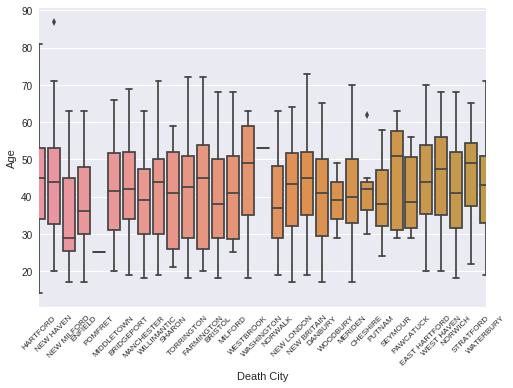

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

#Draw box plot to identify outliers
sns.boxplot(x='Death_City', y='Age', data=data)
plt.xticks(fontsize = 8, rotation = 45)
#display 30 values only
plt.xlim(0,30)

plt.xlabel('Death City')

plt.ylabel('Age')

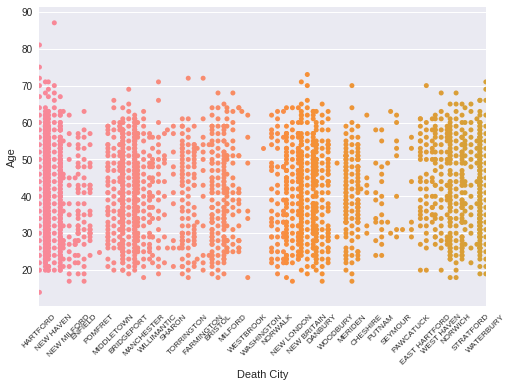

In [35]:
# Bee Swarm!

sns.swarmplot(x='Death_City', y='Age', data=data)
plt.xticks(fontsize = 8, rotation = 45)
#display 30 values only
plt.xlim(0,30)
plt.xlabel('Death City')
plt.ylabel('Age')
plt.show()